<a href="https://colab.research.google.com/github/pennya6/CJ_project/blob/main/%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%8B%9C%EC%97%B0api%EC%82%AC%EC%9A%A9_Test(%EC%87%BC%ED%95%91%EC%9D%B8%EC%82%AC%EC%9D%B4%ED%8A%B8%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://yobro.tistory.com/177?category=819175

In [ ]:
import os
import sys
import urllib.request
import json
import pandas as pd


In [ ]:
client_id = "xwXqTPunydI8YepJl1Ye"
client_secret = "wLD28eqYjF"
url = "https://openapi.naver.com/v1/datalab/shopping/categories";

In [ ]:

body = "{\"startDate\":\"2021-01-01\",\"endDate\":\"2021-10-01\",\"timeUnit\":\"month\",\"category\":[{\"name\":\"사이다\",\"param\":[\"50002253\"]},{\"name\":\"콜라\",\"param\":[\"50002254\"]}],\"device\":\"pc\",\"ages\":[\"20\",\"30\"],\"gender\":\"f\"}";


In [ ]:

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    scraped=response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

In [ ]:
data=json.loads(scraped)

In [ ]:
data

{'endDate': '2021-10-01',
 'results': [{'category': ['50002253'],
   'data': [{'period': '2021-01-01', 'ratio': 26.40303},
    {'period': '2021-02-01', 'ratio': 27.16143},
    {'period': '2021-03-01', 'ratio': 39.11159},
    {'period': '2021-04-01', 'ratio': 40.87757},
    {'period': '2021-05-01', 'ratio': 39.52329},
    {'period': '2021-06-01', 'ratio': 42.74106},
    {'period': '2021-07-01', 'ratio': 39.6858},
    {'period': '2021-08-01', 'ratio': 41.75514},
    {'period': '2021-09-01', 'ratio': 43.01191}],
   'title': '사이다'},
  {'category': ['50002254'],
   'data': [{'period': '2021-01-01', 'ratio': 63.35861},
    {'period': '2021-02-01', 'ratio': 52.17768},
    {'period': '2021-03-01', 'ratio': 67.96316},
    {'period': '2021-04-01', 'ratio': 74.91874},
    {'period': '2021-05-01', 'ratio': 76.57638},
    {'period': '2021-06-01', 'ratio': 99.2091},
    {'period': '2021-07-01', 'ratio': 100},
    {'period': '2021-08-01', 'ratio': 93.62946},
    {'period': '2021-09-01', 'ratio': 93.2

In [ ]:
date = [a['period'] for a in result['results'][0]['data']]

corona_ratio = [a['ratio'] for a in result['results'][0]['data']]
coronavirus_ratio = [a['ratio'] for a in result['results'][1]['data']]

new=pd.DataFrame({'date':date, 
              '사이다':corona_ratio,
              '콜라':coronavirus_ratio})

In [ ]:
new

,date,사이다,콜라
0,2021-01-01,26.40303,63.35861
1,2021-02-01,27.16143,52.17768
2,2021-03-01,39.11159,67.96316
3,2021-04-01,40.87757,74.91874
4,2021-05-01,39.52329,76.57638
5,2021-06-01,42.74106,99.20910
6,2021-07-01,39.68580,100.00000
7,2021-08-01,41.75514,93.62946
8,2021-09-01,43.01191,93.27193


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

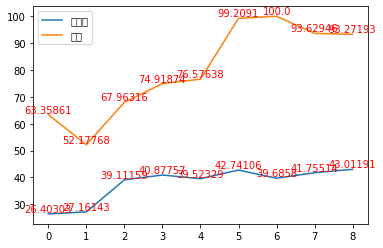

In [ ]:
import matplotlib.pyplot as plt

plt.plot(new.index,new['사이다'])
for x,y in enumerate(list(new['사이다'])):
  plt.text(x,y,y,fontsize=10,color="#ff0000",horizontalalignment='center',verticalalignment='bottom')

plt.plot(new.index,new['콜라'])
for x,y in enumerate(list(new['콜라'])):
  plt.text(x,y,y,fontsize=10,color="#ff0000",horizontalalignment='center',verticalalignment='bottom')

plt.legend(['사이다','콜라'],loc='upper left')
plt.show()